In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from scipy.stats import boxcox
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('MortgageDeqlncy2to5anlaysis2.csv')


In [3]:
df1.describe(include ='all')

,credit_score,first_time_homebuyer_flag,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,property_st,property_type,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,curr_ln_delq_stas
count,4428.000000,4428,4428.000000,4428.000000,4428,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428,4428,4428,4428,4428,4428,4428.000000,4428.000000,4428,4428.000000
unique,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,3,1,52,4,4428,3,NaN,NaN,8,NaN
top,NaN,9,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,R,N,CA,SF,F112Q2009346,P,NaN,NaN,Other sellers,NaN
freq,NaN,2856,NaN,NaN,4014,NaN,NaN,NaN,NaN,NaN,2675,4428,412,3281,1,1769,NaN,NaN,2190,NaN
mean,762.573622,NaN,4.647471,1.018293,NaN,73.491192,31.958220,217312.556459,72.391599,4.072042,NaN,NaN,NaN,NaN,NaN,NaN,359.842141,1.591238,NaN,0.469964
std,39.518410,NaN,10.254836,0.168383,NaN,15.234472,10.049452,115790.382002,15.481599,0.258586,NaN,NaN,NaN,NaN,NaN,NaN,2.288867,0.491661,NaN,7.375455
min,605.000000,NaN,0.000000,1.000000,NaN,13.000000,0.000000,25000.000000,13.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,308.000000,1.000000,NaN,0.000000
25%,737.000000,NaN,0.000000,1.000000,NaN,66.000000,24.000000,127000.000000,64.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,1.000000,NaN,0.000000
50%,772.000000,NaN,0.000000,1.000000,NaN,78.000000,33.000000,193000.000000,77.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,2.000000,NaN,0.000000
75%,794.000000,NaN,0.000000,1.000000,NaN,80.000000,40.000000,289000.000000,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,2.000000,NaN,0.000000


Text(0.5, 1.0, 'Correlation matrix')

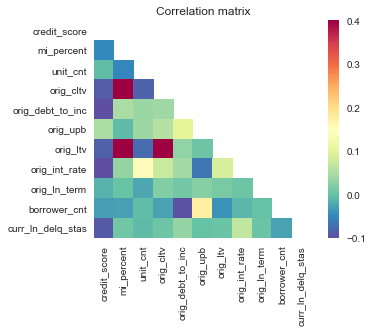

In [4]:
#correlation graphic to see which features are more corrrelated with each other

corrs = df1.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.1, vmax=.4)
plt.title('Correlation matrix')

In [5]:
# correlation matrix number; closer to 1 is positive correlation closer to -1 is a negative correlation 
df1.corr()

,credit_score,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,orig_ln_term,borrower_cnt,curr_ln_delq_stas
credit_score,1.000000,-0.048066,-0.002833,-0.088195,-0.130594,0.048511,-0.083392,-0.190477,-0.012232,-0.030085,-0.088631
mi_percent,-0.048066,1.000000,-0.049245,0.557836,0.048817,-0.005387,0.581127,0.034027,0.001911,-0.027915,0.008060
unit_cnt,-0.002833,-0.049245,1.000000,-0.080994,0.037962,0.040059,-0.073803,0.156489,-0.022397,-0.002429,-0.004923
orig_cltv,-0.088195,0.557836,-0.080994,1.000000,0.040648,0.059554,0.956263,0.075477,0.020104,-0.026537,0.006449
orig_debt_to_inc,-0.130594,0.048817,0.037962,0.040648,1.000000,0.100106,0.032582,0.043925,0.011242,-0.097910,0.034520
orig_upb,0.048511,-0.005387,0.040059,0.059554,0.100106,1.000000,0.005503,-0.063663,0.023955,0.176928,0.000199
orig_ltv,-0.083392,0.581127,-0.073803,0.956263,0.032582,0.005503,1.000000,0.089381,0.014883,-0.040663,0.004485
orig_int_rate,-0.190477,0.034027,0.156489,0.075477,0.043925,-0.063663,0.089381,1.000000,0.005479,-0.009958,0.067994
orig_ln_term,-0.012232,0.001911,-0.022397,0.020104,0.011242,0.023955,0.014883,0.005479,1.000000,0.001460,0.004182
borrower_cnt,-0.030085,-0.027915,-0.002429,-0.026537,-0.097910,0.176928,-0.040663,-0.009958,0.001460,1.000000,-0.026373


In [6]:
df1.dtypes

credit_score                  int64
first_time_homebuyer_flag    object
mi_percent                    int64
unit_cnt                      int64
occupancy_status             object
orig_cltv                     int64
orig_debt_to_inc              int64
orig_upb                      int64
orig_ltv                      int64
orig_int_rate                 int64
channel                      object
ppm_flag                     object
property_st                  object
property_type                object
ln_seq_number                object
ln_purpose                   object
orig_ln_term                  int64
borrower_cnt                  int64
seller_name                  object
curr_ln_delq_stas             int64
dtype: object

In [7]:
# review of the sellers to see what if any possible insights sellers affect the delquency of a loan
df1.groupby(['seller_name']).mean()

,credit_score,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,orig_ln_term,borrower_cnt,curr_ln_delq_stas
seller_name,,,,,,,,,,,
BRANCHBANKING&TRUSTC,761.416667,5.979730,1.015766,74.882883,31.105856,208729.729730,74.270270,4.117117,359.898649,1.572072,0.340090
FIFTHTHIRDBANK,762.329466,6.192575,1.004640,76.791183,30.624130,196250.580046,75.582367,4.037123,359.832947,1.538283,0.264501
GREENLIGHTFINANCIALS,754.781250,0.885417,1.031250,64.208333,32.864583,264864.583333,62.583333,4.104167,360.000000,1.635417,2.854167
"JPMORGANCHASEBANK,NA",762.285714,0.000000,1.000000,64.571429,45.714286,233857.142857,64.571429,4.142857,360.000000,1.428571,0.000000
Other sellers,759.317352,4.958447,1.023744,73.851598,32.329680,191852.968037,73.152055,4.080822,359.750685,1.592694,0.619178
PROVIDENTFUNDINGASSO,773.500000,1.097633,1.026627,67.008876,32.736686,286730.769231,64.026627,4.000000,360.000000,1.633136,0.011834
UNIONSAVINGSBANK,785.205128,2.051282,1.000000,68.769231,26.153846,169076.923077,66.102564,4.000000,359.076923,1.717949,1.128205
USBANKNA,767.018120,4.371461,1.009060,74.056625,31.867497,265310.305776,72.611552,4.071348,360.000000,1.597961,0.156285


In [19]:
# review of the occupancy status to see what if any possible insights occupancy status affect the delquency of a loan
df1.groupby(['occupancy_status']).mean()

,credit_score,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,orig_ln_term,borrower_cnt,curr_ln_delq_stas
occupancy_status,,,,,,,,,,,
I,766.870968,0.000000,1.184332,69.626728,32.852535,161783.410138,69.285714,4.539171,359.995392,1.626728,0.138249
P,762.204783,5.117838,1.010214,73.870204,31.906079,220572.994519,72.703288,4.047833,359.826109,1.582711,0.497509
S,765.355330,0.182741,1.000000,70.025381,32.035533,212045.685279,69.461929,4.050761,360.000000,1.725888,0.274112


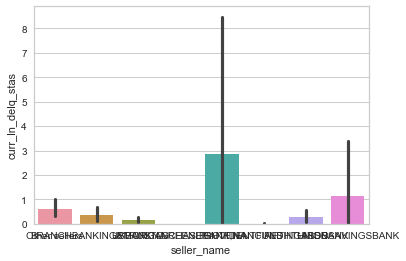

In [8]:
sns.barplot(df1['seller_name'], df1['curr_ln_delq_stas']);

In [9]:
df1 = df1.drop(['ln_seq_number'], axis =1)

In [10]:
df1.dtypes

credit_score                  int64
first_time_homebuyer_flag    object
mi_percent                    int64
unit_cnt                      int64
occupancy_status             object
orig_cltv                     int64
orig_debt_to_inc              int64
orig_upb                      int64
orig_ltv                      int64
orig_int_rate                 int64
channel                      object
ppm_flag                     object
property_st                  object
property_type                object
ln_purpose                   object
orig_ln_term                  int64
borrower_cnt                  int64
seller_name                  object
curr_ln_delq_stas             int64
dtype: object

In [11]:
# turns catagorical data into numeric data within the dataframe for data analysis within Machine Learning
df = pd.get_dummies(df1, drop_first = True)
df.head(10)

,credit_score,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,orig_ln_term,borrower_cnt,...,property_type_SF,ln_purpose_N,ln_purpose_P,seller_name_FIFTHTHIRDBANK,seller_name_GREENLIGHTFINANCIALS,"seller_name_JPMORGANCHASEBANK,NA",seller_name_Other sellers,seller_name_PROVIDENTFUNDINGASSO,seller_name_UNIONSAVINGSBANK,seller_name_USBANKNA
0,683,0,1,53,40,300000,53,4,360,2,...,1,1,0,0,0,0,1,0,0,0
1,751,30,1,92,43,263000,92,4,360,2,...,1,0,1,0,0,0,0,0,0,0
2,748,12,1,85,41,169000,85,4,360,2,...,1,0,1,0,0,0,1,0,0,0
3,771,0,1,51,16,357000,51,4,360,1,...,1,0,0,0,0,0,1,0,0,0
4,766,0,1,78,43,417000,78,4,360,2,...,1,0,1,0,0,0,1,0,0,0
5,696,25,1,86,34,150000,86,4,360,1,...,1,0,1,0,0,0,1,0,0,0
6,787,0,1,85,15,409000,69,4,360,1,...,1,1,0,0,0,0,1,0,0,0
7,781,0,1,95,44,400000,74,4,360,1,...,1,1,0,0,0,0,0,0,0,0
8,793,0,1,91,40,352000,80,4,360,2,...,0,1,0,0,0,0,0,0,0,0
9,802,0,1,66,39,83000,66,4,360,1,...,1,1,0,0,0,0,1,0,0,0


In [20]:
# set up for Machine Learning 
X = df[df.loc[:, df.columns != 'curr_ln_deql_stas'].columns]
y = df['curr_ln_delq_stas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [21]:
print('Inputs: \n', X_train.head())
print('Outputs: \n', y_train.head())

Inputs: 
       credit_score  mi_percent  unit_cnt  orig_cltv  orig_debt_to_inc  \
2480           773           0         1         67                20   
681            773           0         1         80                26   
2670           730          25         1         88                43   
3345           734           0         1         70                39   
250            809           0         1         60                46   

      orig_upb  orig_ltv  orig_int_rate  orig_ln_term  borrower_cnt  ...  \
2480     74000        67              5           360             2  ...   
681     110000        80              4           360             1  ...   
2670    104000        88              4           360             1  ...   
3345    321000        70              4           360             1  ...   
250     202000        54              4           360             1  ...   

      property_type_SF  ln_purpose_N  ln_purpose_P  \
2480                 1             0    

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
# Model performance
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.958 +/- 0.022


In [16]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, 
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


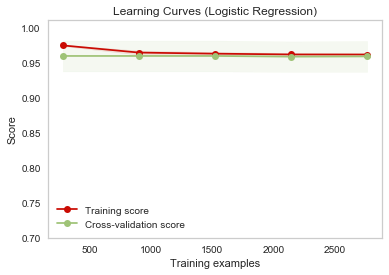

In [17]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

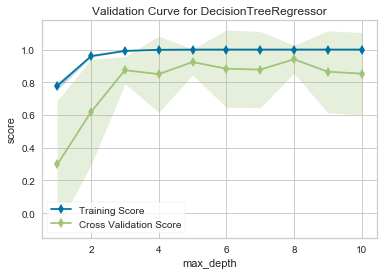

In [18]:
viz = ValidationCurve(DecisionTreeRegressor(), param_name ="max_depth", param_range=np.arange(1,11), cv=10, scoring ="r2")
viz.fit(X, y)
viz.show()

In [30]:
# Apply Box-Cox transformation

X_train_transformed = X_train.copy()
X_train_transformed['curr_ln_delq_stas'] = boxcox(X_train_transformed['curr_ln_delq_stas'] + 1)[0]
X_test_transformed = X_test.copy()
X_test_transformed['curr_ln_delq_stas'] = boxcox(X_test_transformed['curr_ln_delq_stas'] + 1)[0]

In [31]:
# Rescale data

scaler = MinMaxScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)
X_test_transformed_scaled = scaler.transform(X_test_transformed)

In [32]:
# Get polynomial features

poly = PolynomialFeatures(degree=2).fit(X_train_transformed)
X_train_poly = poly.transform(X_train_transformed_scaled)
X_test_poly = poly.transform(X_test_transformed_scaled)

In [33]:
# Select features using chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Get score using original model
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

## Get score using models with feature selection
for i in range(1, X_train_poly.shape[1]+1, 1):
    # Select i features
    select = SelectKBest(score_func=chi2, k=i)
    select.fit(X_train_poly, y_train)
    X_train_poly_selected = select.transform(X_train_poly)

    # Model with i features selected
    logreg.fit(X_train_poly_selected, y_train)
    scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
    print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i, 
                                                                     np.mean(scores), 
                                                                     np.std(scores)))
    
    # Save results if best score
    if np.mean(scores) > highest_score:
        highest_score = np.mean(scores)
        std = np.std(scores)
        k_features_highest_score = i
    elif np.mean(scores) == highest_score:
        if np.std(scores) < std:
            highest_score = np.mean(scores)
            std = np.std(scores)
            k_features_highest_score = i
        
# Print the number of features
print('Number of features when highest score: %i' % k_features_highest_score)

CV accuracy (original): 0.958 +/- 0.022
CV accuracy (number of features = 1): 0.959 +/- 0.022
CV accuracy (number of features = 2): 0.959 +/- 0.022
CV accuracy (number of features = 3): 0.959 +/- 0.022
CV accuracy (number of features = 4): 0.981 +/- 0.022
CV accuracy (number of features = 5): 0.981 +/- 0.022
CV accuracy (number of features = 6): 0.981 +/- 0.022
CV accuracy (number of features = 7): 0.981 +/- 0.022
CV accuracy (number of features = 8): 0.981 +/- 0.022
CV accuracy (number of features = 9): 0.981 +/- 0.022
CV accuracy (number of features = 10): 0.981 +/- 0.022
CV accuracy (number of features = 11): 0.981 +/- 0.022
CV accuracy (number of features = 12): 0.981 +/- 0.022
CV accuracy (number of features = 13): 0.981 +/- 0.022
CV accuracy (number of features = 14): 0.981 +/- 0.022
CV accuracy (number of features = 15): 0.981 +/- 0.022
CV accuracy (number of features = 16): 0.981 +/- 0.022
CV accuracy (number of features = 17): 0.980 +/- 0.022
CV accuracy (number of features = 

KeyboardInterrupt: 